### Protein Family Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
family_classification_metadata = pd.read_table('../seminar_5/data/family_classification_metadata.tab')
family_classification_sequences = pd.read_table('../seminar_5/data/family_classification_sequences.tab')

In [3]:
proto_vectors = pd.read_table('protVec_100d_3grams.csv', delimiter='\t', header=None, index_col=0)

In [4]:
family_classification_metadata.head()

,SwissProtAccessionID,LongID,ProteinName,FamilyID,FamilyDescription
0,Q6GZX4,001R_FRG3G,Putative transcription factor 001R,Pox_VLTF3,Poxvirus Late Transcription Factor VLTF3 like
1,Q6GZX3,002L_FRG3G,Uncharacterized protein 002L,DUF230,Poxvirus proteins of unknown function
2,Q6GZX0,005R_FRG3G,Uncharacterized protein 005R,US22,US22 like
3,Q91G88,006L_IIV6,Putative KilA-N domain-containing protein 006L,DUF3627,Protein of unknown function (DUF3627)
4,Q197F3,007R_IIV3,Uncharacterized protein 007R,DUF2738,Protein of unknown function (DUF2738)


In [5]:
family_classification_sequences.head()

,Sequences
0,MAFSAEDVLKEYDRRRRMEALLLSLYYPNDRKLLDYKEWSPPRVQV...
1,MSIIGATRLQNDKSDTYSAGPCYAGGCSAFTPRGTCGKDWDLGEQT...
2,MQNPLPEVMSPEHDKRTTTPMSKEANKFIRELDKKPGDLAVVSDFV...
3,MDSLNEVCYEQIKGTFYKGLFGDFPLIVDKKTGCFNATKLCVLGGK...
4,MEAKNITIDNTTYNFFKFYNINQPLTNLKYLNSERLCFSNAVMGKI...


In [6]:
proto_vectors.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,,,,,,,,,,,,,,,,,,,,,
AAA,-0.174060,-0.095756,0.059515,0.039673,-0.375934,-0.115415,0.090725,0.173422,0.292520,0.190375,...,0.244482,0.015974,0.012903,0.137528,0.138140,0.005474,0.070719,-0.164084,-0.179274,0.184899
ALA,-0.114085,-0.093288,0.155800,-0.037351,-0.121446,0.084037,0.023819,0.093442,0.143256,0.044627,...,0.075584,-0.139661,0.034863,0.056078,0.028975,-0.012233,0.059669,0.037811,-0.172493,0.074655
LLL,-0.075594,-0.100834,-0.046616,-0.208980,-0.008596,-0.038612,-0.049360,0.060720,-0.062662,-0.155879,...,0.174677,-0.175961,-0.193242,-0.072965,-0.075560,0.158286,-0.026378,0.037155,-0.176038,0.319293
LAA,-0.137546,-0.135425,0.121566,-0.038295,-0.212129,0.040009,0.078545,0.029837,0.138343,0.049377,...,0.133947,-0.156484,-0.048541,0.141848,0.081842,0.070573,0.006927,0.035281,-0.138971,0.105997
AAL,-0.156112,-0.133524,0.114426,-0.020264,-0.058513,0.057005,0.076881,0.054781,0.129436,0.019448,...,0.154597,-0.050440,0.054866,0.066185,0.017498,0.001773,-0.083944,-0.003867,-0.106367,0.070706


In [7]:
family_classification_metadata.describe()

,SwissProtAccessionID,LongID,ProteinName,FamilyID,FamilyDescription
count,324018,324018,324018,324018,324018
unique,287308,295671,56951,7027,6967
top,Q1X881,POLG_LANVT,UvrABC system protein B,MMR_HSR1,50S ribosome-binding GTPase
freq,16,12,1500,3084,3084


#### Task:
    
Use your ProtVec embedding from homework 5 to perform protein family classification using RNN.

Article with the original research can be found here http://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0141287&type=printable

* use 1000 most frequent families for classification
* validate your results on the train-test split
* reduce the dimensionality of the protein-space using Stochastic Neighbor Embedding and visualize two most frequent classes
* compare your RNN results with SVM
* visualization and metrics are up to you

In [8]:
# get most frequent seq-s
most_freq = family_classification_metadata['FamilyID'].value_counts().iloc[:1000]
most_most_freq = family_classification_metadata['FamilyID'].value_counts().iloc[:2]
fid_most_freq = most_freq.index.values
fid_most_most_freq = most_most_freq.index.values

In [9]:
MAX_LENGTH = 390

def get_repres(sseq):
    crop = len(sseq) % 3
    cropped_seq = sseq[:-crop] if crop > 0 else sseq
    
    repres = np.zeros((MAX_LENGTH//3, 100))
    for i in range(0, len(cropped_seq), 3):
        codone = cropped_seq[i:i+3]
        if codone in proto_vectors.index:
            repres[int(i/3)] = proto_vectors.loc[codone]

    return repres

In [10]:
rows = family_classification_metadata['FamilyID'].isin(fid_most_most_freq)
most_freq_seqs = family_classification_sequences.loc[rows]['Sequences']
most_freq_classes = family_classification_metadata.loc[rows]['FamilyID']

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(proto_vectors)

In [12]:
tsne_df = pd.DataFrame(embeddings_tsne, columns=['x0', 'x1'], index=proto_vectors.index)
tsne_df.head()

,x0,x1
0,,
AAA,3.448284,-3.949775
ALA,2.758263,-4.583681
LLL,1.407525,-5.544826
LAA,2.729012,-4.329892
AAL,2.790550,-4.428670


In [13]:
x = []
y = []
clazz = []
for i, seq in enumerate(most_freq_seqs):
    crop = len(seq) % 3
    cropped_seq = seq[:-crop] if crop > 0 else seq
    
    repres = np.zeros((2,))
    for j in range(0, len(cropped_seq), 3):
        codone = cropped_seq[j:j+3]
        if codone in proto_vectors.index:
            repres += tsne_df.loc[codone]
    
    x.append(repres[0])
    y.append(repres[1])
    
    if most_freq_classes.iloc[i] == most_most_freq.index[0]:
        clazz.append(0)
    else:
        clazz.append(1)

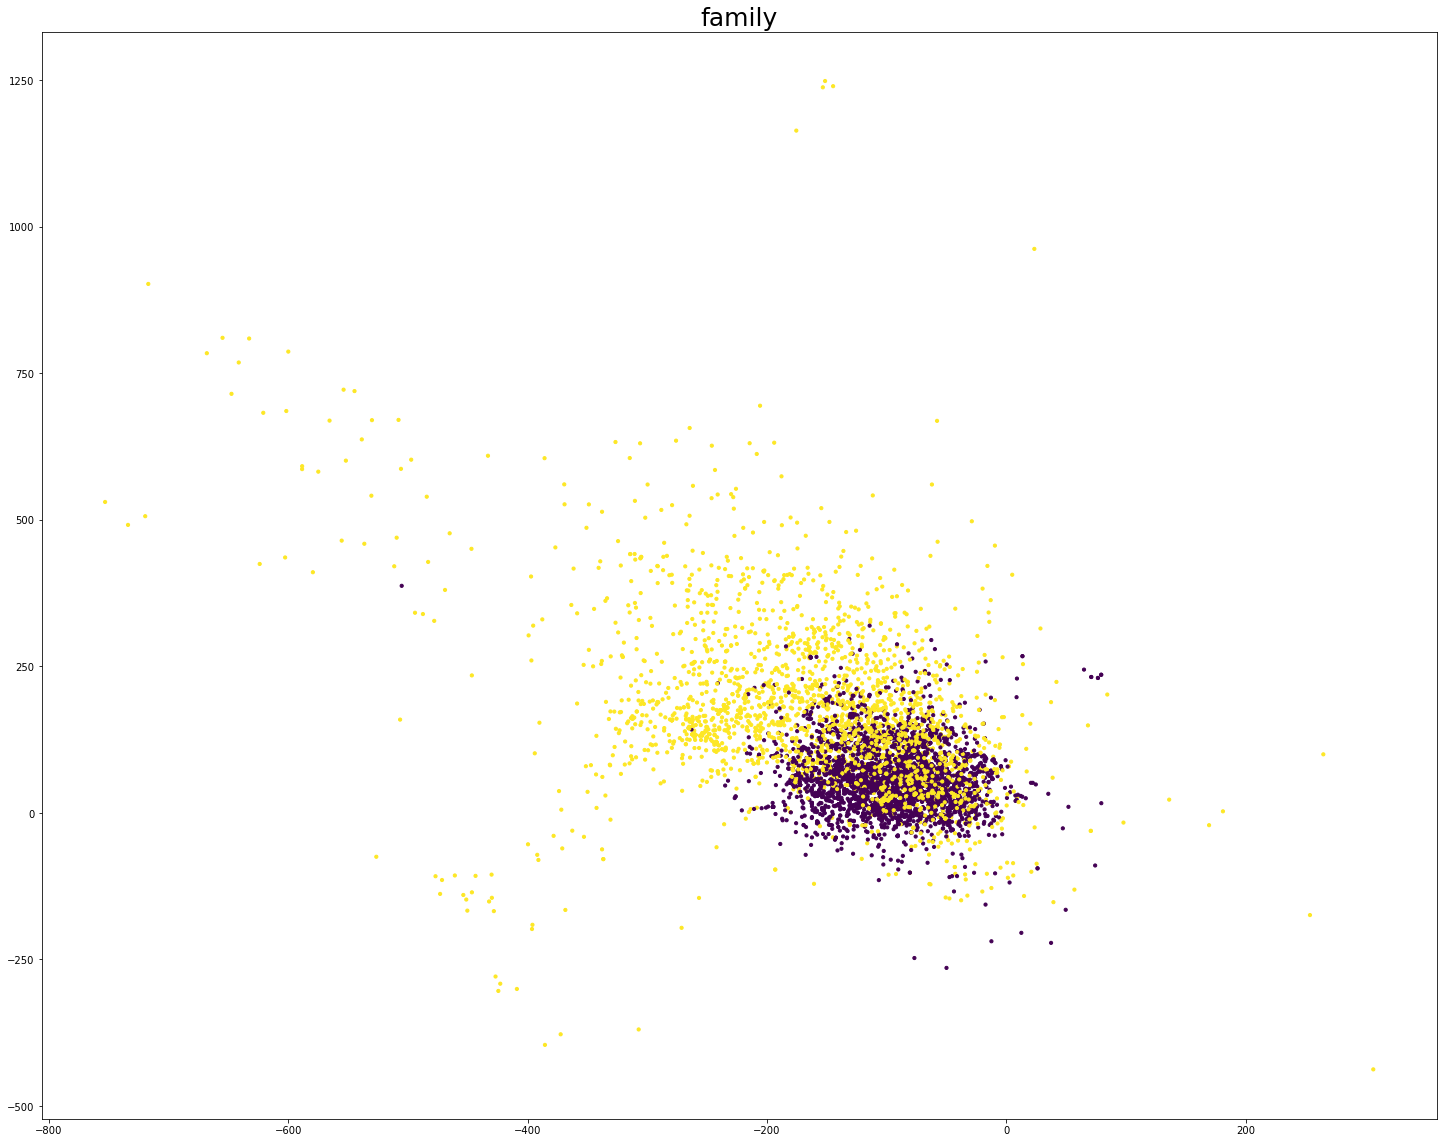

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 20))
plt.title("family", fontsize=25)
plt.scatter(x, y, c=clazz, s=10)
plt.show()

In [12]:
import numpy as np

rows = family_classification_metadata['FamilyID'].isin(fid_most_freq)
all_seqs = family_classification_sequences.loc[rows]['Sequences']
all_classes = family_classification_metadata.loc[rows]['FamilyID']

rows = all_seqs.apply(lambda seq: len(seq) < MAX_LENGTH)
seqs = all_seqs[rows]
classes = all_classes[rows]

print(len(seqs))

ohe = {}
for num, clazz in enumerate(fid_most_freq):
    ohe[clazz] = np.zeros(1000)
    ohe[clazz][num] = 1

repres_data = []
class_data = []
for num, seq in enumerate(seqs):
    if num % 1000 == 0:
        print(num)
    if len(seq) < MAX_LENGTH:
        repres = get_repres(seq)
        repres_data.append(repres)
        class_data.append(ohe[classes.iloc[num]])

159135
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000


In [15]:
repres_data[0].shape

(130, 100)

In [17]:
# import pickle
# file_repres = 'repres_data.pickle'
# file_class = 'class_data.pickle'
# with open(file_repres, 'wb') as file_to:
#     repres_data.dump(file_to)
# with open(file_class, 'wb') as file_to:
#     class_data.dump(file_to)

AttributeError: 'list' object has no attribute 'dump'

In [18]:
from random import shuffle 

combined = list(zip(repres_data, class_data))
shuffle(combined)

repres_data[:], class_data[:] = zip(*combined)

train_size = int(0.7*len(repres_data))

train_data = (repres_data[:train_size], class_data[:train_size])
test_data = (repres_data[train_size:], class_data[train_size:])

(len(train_data[0]), len(test_data[0]))

(111394, 47741)

In [19]:
from lazy import lazy

class SequenceClassificationModel:
    _DATA_CLASSES = 1000
    
    def __init__(self, params):
        self.params = params
        self._create_placeholders()
        self.prediction
        self.cost
        self.error
        self.optimize
        self._create_summaries()
    
    def _create_placeholders(self):
        with tf.name_scope("data"):
            self.data = tf.placeholder(tf.float32, [None, self.params.seq_length, self.params.embed_length])
            self.target = tf.placeholder(tf.float32, [None, self._DATA_CLASSES])
  
    def _create_summaries(self):
        with tf.name_scope("summaries"):
            tf.summary.scalar('loss', self.cost)
            tf.summary.scalar('error', self.error)
            self.summary = tf.summary.merge_all()
            saver = tf.train.Saver()
            
    @lazy
    def length(self):
    # First, we obtain the lengths of sequences in the current data batch. We need this since
    # the data comes as a single tensor, padded with zero vectors to the longest review length.
    # Instead of keeping track of the sequence lengths of every review, we just compute it
    # dynamically in TensorFlow.
    
        with tf.name_scope("seq_length"):
            used = tf.sign(tf.reduce_max(tf.abs(self.data), reduction_indices=2))
            length = tf.reduce_sum(used, reduction_indices=1)
            length = tf.cast(length, tf.int32)
        return length
    
    @lazy
    def prediction(self):
    # Note that the last relevant output activation of the RNN has a different index for each
    # sequence in the training batch. This is because each review has a different length. We
    # already know the length of each sequence.
    # The problem is that we want to index in the dimension of time steps, which is
    # the second dimension in the batch of shape  (sequences, time_steps, word_vectors) .
    
        with tf.name_scope("recurrent_layer"):
            output, _ = tf.nn.dynamic_rnn(
                self.params.rnn_cell(self.params.rnn_hidden),
                self.data,
                dtype=tf.float32,
                sequence_length=self.length
            )
        last = self._last_relevant(output, self.length)

        with tf.name_scope("softmax_layer"):
            num_classes = int(self.target.get_shape()[1])
            weight = tf.Variable(tf.truncated_normal(
                [self.params.rnn_hidden, num_classes], stddev=0.01))
            bias = tf.Variable(tf.constant(0.1, shape=[num_classes]))
            prediction = tf.nn.softmax(tf.matmul(last, weight) + bias)
        return prediction
    
    @lazy
    def cost(self):
        cross_entropy = -tf.reduce_sum(self.target * tf.log(self.prediction))
        return cross_entropy
    
    @lazy
    def error(self):
        self.mistakes = tf.not_equal(
            tf.argmax(self.target, 1), tf.argmax(self.prediction, 1))
        return tf.reduce_mean(tf.cast(self.mistakes, tf.float32))
    
    @lazy
    def optimize(self):
    # RNNs are quite hard to train and weights tend to diverge if the hyper parameters do not
    # play nicely together. The idea of gradient clipping is to restrict the the values of the
    # gradient to a sensible range. This way, we can limit the maximum weight updates.

        with tf.name_scope("optimization"):
            gradient = self.params.optimizer.compute_gradients(self.cost)
            if self.params.gradient_clipping:
                limit = self.params.gradient_clipping
                gradient = [
                    (tf.clip_by_value(g, -limit, limit), v)
                    if g is not None else (None, v)
                    for g, v in gradient]
            optimize = self.params.optimizer.apply_gradients(gradient)
        return optimize
    
    @staticmethod
    def _last_relevant(output, length):
        with tf.name_scope("last_relevant"):
            # As of now, TensorFlow only supports indexing along the first dimension, using
            # tf.gather() . We thus flatten the first two dimensions of the output activations from their
            # shape of  sequences x time_steps x word_vectors  and construct an index into this resulting tensor.
            batch_size = tf.shape(output)[0]
            max_length = int(output.get_shape()[1])
            output_size = int(output.get_shape()[2])

            # The index takes into account the start indices for each sequence in the flat tensor and adds
            # the sequence length to it. Actually, we only add  length - 1  so that we select the last valid
            # time step.
            index = tf.range(0, batch_size) * max_length + (length - 1)
            flat = tf.reshape(output, [-1, output_size])
            relevant = tf.gather(flat, index)
        return relevant

In [20]:
def preprocess_batched(data, batch_size):
    for i in range(0, len(data[0]), batch_size):
        end = min(i + batch_size, len(data[0]))
        yield data[0][i:end], data[1][i:end]

In [21]:
from attrdict import AttrDict
import tensorflow as tf

params = AttrDict(
    rnn_cell=tf.contrib.rnn.GRUCell,
    rnn_hidden=256,
    optimizer=tf.train.RMSPropOptimizer(0.002),
    batch_size=20,
    gradient_clipping=100,
    seq_length=MAX_LENGTH//3,
    embed_length=100
)

In [30]:
batches = preprocess_batched(train_data, params.batch_size)
test_batches = preprocess_batched(test_data, params.batch_size)

In [31]:
tf.reset_default_graph()

model = SequenceClassificationModel(params)

/opt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [32]:
iterations = 5000
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.33)
saver = tf.train.Saver()
import os
if not os.path.exists("checkpoints/protein"):
    os.makedirs("checkpoints/protein")

with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    try:
        print("Trying to restore last checkpoint ...")
        saver.restore(sess, save_path="checkpoints/protein")
    except:
        print("Failed to restore checkpoint. Initializing variables instead.")
        sess.run(tf.global_variables_initializer())
    summary_writer = tf.summary.FileWriter('graphs', sess.graph)
    for index, batch in enumerate(batches):
        if index > iterations:
            break
        feed = {model.data: batch[0], model.target: batch[1]}
        error, _, summary_str = sess.run([model.error, model.optimize, model.summary], feed)
        print('{}: {:3.1f}%'.format(index + 1, 100 * error))
        if index % 100 == 0:
            saver.save(sess, "checkpoints/protein", index)
            print("Saved checkpoint.")
            summary_writer.add_summary(summary_str, index)
    errors = []
    for index, batch in enumerate(batches):
        feed = {model.data: batch[0], model.target: batch[1]}
        error = sess.run([model.error], feed)
        errors += error
    print(sum(errors)/len(errors))

Trying to restore last checkpoint ...
INFO:tensorflow:Restoring parameters from checkpoints/protein
Failed to restore checkpoint. Initializing variables instead.
1: 100.0%
Saved checkpoint.
2: 100.0%
3: 100.0%
4: 100.0%
5: 100.0%
6: 100.0%
7: 100.0%
8: 100.0%
9: 100.0%
10: 100.0%
11: 100.0%
12: 100.0%
13: 100.0%
14: 100.0%
15: 100.0%
16: 95.0%
17: 100.0%
18: 95.0%
19: 100.0%
20: 100.0%
21: 100.0%
22: 100.0%
23: 100.0%
24: 100.0%
25: 100.0%
26: 100.0%
27: 100.0%
28: 100.0%
29: 100.0%
30: 100.0%
31: 100.0%
32: 100.0%
33: 100.0%
34: 100.0%
35: 100.0%
36: 95.0%
37: 100.0%
38: 100.0%
39: 95.0%
40: 100.0%
41: 100.0%
42: 100.0%
43: 100.0%
44: 100.0%
45: 100.0%
46: 100.0%
47: 95.0%
48: 100.0%
49: 100.0%
50: 95.0%
51: 95.0%
52: 100.0%
53: 100.0%
54: 100.0%
55: 100.0%
56: 100.0%
57: 100.0%
58: 100.0%
59: 100.0%
60: 100.0%
61: 100.0%
62: 100.0%
63: 100.0%
64: 100.0%
65: 100.0%
66: 100.0%
67: 95.0%
68: 95.0%
69: 100.0%
70: 100.0%
71: 100.0%
72: 100.0%
73: 95.0%
74: 100.0%
75: 100.0%
76: 100.0%
77:

700: 80.0%
701: 90.0%
Saved checkpoint.
702: 95.0%
703: 90.0%
704: 70.0%
705: 90.0%
706: 95.0%
707: 75.0%
708: 95.0%
709: 100.0%
710: 75.0%
711: 80.0%
712: 85.0%
713: 70.0%
714: 70.0%
715: 90.0%
716: 80.0%
717: 95.0%
718: 90.0%
719: 90.0%
720: 80.0%
721: 75.0%
722: 100.0%
723: 80.0%
724: 95.0%
725: 90.0%
726: 85.0%
727: 90.0%
728: 65.0%
729: 75.0%
730: 85.0%
731: 95.0%
732: 95.0%
733: 75.0%
734: 80.0%
735: 95.0%
736: 95.0%
737: 80.0%
738: 85.0%
739: 85.0%
740: 95.0%
741: 85.0%
742: 70.0%
743: 80.0%
744: 95.0%
745: 75.0%
746: 70.0%
747: 75.0%
748: 90.0%
749: 80.0%
750: 90.0%
751: 100.0%
752: 90.0%
753: 80.0%
754: 90.0%
755: 85.0%
756: 80.0%
757: 95.0%
758: 85.0%
759: 85.0%
760: 70.0%
761: 95.0%
762: 75.0%
763: 85.0%
764: 85.0%
765: 90.0%
766: 70.0%
767: 95.0%
768: 90.0%
769: 80.0%
770: 85.0%
771: 80.0%
772: 75.0%
773: 70.0%
774: 100.0%
775: 80.0%
776: 95.0%
777: 80.0%
778: 75.0%
779: 85.0%
780: 90.0%
781: 95.0%
782: 90.0%
783: 85.0%
784: 80.0%
785: 80.0%
786: 90.0%
787: 95.0%
788: 65.0%

1397: 60.0%
1398: 65.0%
1399: 70.0%
1400: 75.0%
1401: 80.0%
Saved checkpoint.
1402: 65.0%
1403: 70.0%
1404: 50.0%
1405: 65.0%
1406: 65.0%
1407: 65.0%
1408: 85.0%
1409: 45.0%
1410: 65.0%
1411: 80.0%
1412: 50.0%
1413: 65.0%
1414: 75.0%
1415: 60.0%
1416: 70.0%
1417: 65.0%
1418: 70.0%
1419: 65.0%
1420: 80.0%
1421: 55.0%
1422: 90.0%
1423: 70.0%
1424: 45.0%
1425: 70.0%
1426: 80.0%
1427: 85.0%
1428: 75.0%
1429: 80.0%
1430: 55.0%
1431: 65.0%
1432: 75.0%
1433: 75.0%
1434: 65.0%
1435: 65.0%
1436: 75.0%
1437: 65.0%
1438: 65.0%
1439: 95.0%
1440: 65.0%
1441: 95.0%
1442: 45.0%
1443: 80.0%
1444: 50.0%
1445: 70.0%
1446: 80.0%
1447: 70.0%
1448: 55.0%
1449: 70.0%
1450: 65.0%
1451: 75.0%
1452: 55.0%
1453: 75.0%
1454: 70.0%
1455: 85.0%
1456: 60.0%
1457: 60.0%
1458: 55.0%
1459: 60.0%
1460: 80.0%
1461: 55.0%
1462: 85.0%
1463: 75.0%
1464: 50.0%
1465: 70.0%
1466: 70.0%
1467: 60.0%
1468: 75.0%
1469: 65.0%
1470: 70.0%
1471: 75.0%
1472: 65.0%
1473: 75.0%
1474: 65.0%
1475: 65.0%
1476: 50.0%
1477: 85.0%
1478: 85.0

2070: 65.0%
2071: 50.0%
2072: 60.0%
2073: 60.0%
2074: 30.0%
2075: 35.0%
2076: 55.0%
2077: 65.0%
2078: 55.0%
2079: 55.0%
2080: 40.0%
2081: 55.0%
2082: 65.0%
2083: 45.0%
2084: 60.0%
2085: 50.0%
2086: 70.0%
2087: 55.0%
2088: 60.0%
2089: 50.0%
2090: 60.0%
2091: 50.0%
2092: 65.0%
2093: 75.0%
2094: 45.0%
2095: 50.0%
2096: 65.0%
2097: 75.0%
2098: 50.0%
2099: 75.0%
2100: 50.0%
2101: 45.0%
Saved checkpoint.
2102: 60.0%
2103: 50.0%
2104: 60.0%
2105: 60.0%
2106: 40.0%
2107: 60.0%
2108: 30.0%
2109: 50.0%
2110: 55.0%
2111: 55.0%
2112: 55.0%
2113: 55.0%
2114: 70.0%
2115: 45.0%
2116: 45.0%
2117: 40.0%
2118: 45.0%
2119: 65.0%
2120: 60.0%
2121: 50.0%
2122: 60.0%
2123: 50.0%
2124: 50.0%
2125: 65.0%
2126: 50.0%
2127: 55.0%
2128: 40.0%
2129: 60.0%
2130: 65.0%
2131: 60.0%
2132: 45.0%
2133: 70.0%
2134: 50.0%
2135: 60.0%
2136: 60.0%
2137: 60.0%
2138: 75.0%
2139: 65.0%
2140: 55.0%
2141: 60.0%
2142: 60.0%
2143: 60.0%
2144: 35.0%
2145: 60.0%
2146: 70.0%
2147: 60.0%
2148: 40.0%
2149: 65.0%
2150: 55.0%
2151: 55.0

2743: 30.0%
2744: 40.0%
2745: 45.0%
2746: 40.0%
2747: 85.0%
2748: 45.0%
2749: 60.0%
2750: 45.0%
2751: 35.0%
2752: 50.0%
2753: 55.0%
2754: 45.0%
2755: 75.0%
2756: 35.0%
2757: 30.0%
2758: 55.0%
2759: 55.0%
2760: 45.0%
2761: 40.0%
2762: 40.0%
2763: 70.0%
2764: 35.0%
2765: 25.0%
2766: 45.0%
2767: 50.0%
2768: 45.0%
2769: 60.0%
2770: 50.0%
2771: 30.0%
2772: 60.0%
2773: 35.0%
2774: 45.0%
2775: 55.0%
2776: 55.0%
2777: 60.0%
2778: 50.0%
2779: 65.0%
2780: 30.0%
2781: 35.0%
2782: 40.0%
2783: 60.0%
2784: 55.0%
2785: 45.0%
2786: 40.0%
2787: 30.0%
2788: 40.0%
2789: 50.0%
2790: 40.0%
2791: 60.0%
2792: 50.0%
2793: 70.0%
2794: 50.0%
2795: 55.0%
2796: 65.0%
2797: 50.0%
2798: 70.0%
2799: 70.0%
2800: 40.0%
2801: 40.0%
Saved checkpoint.
2802: 60.0%
2803: 50.0%
2804: 30.0%
2805: 45.0%
2806: 55.0%
2807: 45.0%
2808: 50.0%
2809: 60.0%
2810: 55.0%
2811: 40.0%
2812: 45.0%
2813: 45.0%
2814: 55.0%
2815: 50.0%
2816: 40.0%
2817: 60.0%
2818: 40.0%
2819: 60.0%
2820: 45.0%
2821: 70.0%
2822: 55.0%
2823: 60.0%
2824: 50.0

3416: 55.0%
3417: 40.0%
3418: 45.0%
3419: 40.0%
3420: 30.0%
3421: 70.0%
3422: 35.0%
3423: 45.0%
3424: 50.0%
3425: 40.0%
3426: 30.0%
3427: 65.0%
3428: 35.0%
3429: 50.0%
3430: 50.0%
3431: 40.0%
3432: 50.0%
3433: 50.0%
3434: 60.0%
3435: 50.0%
3436: 30.0%
3437: 70.0%
3438: 40.0%
3439: 55.0%
3440: 50.0%
3441: 50.0%
3442: 60.0%
3443: 35.0%
3444: 55.0%
3445: 40.0%
3446: 55.0%
3447: 55.0%
3448: 50.0%
3449: 30.0%
3450: 45.0%
3451: 55.0%
3452: 50.0%
3453: 55.0%
3454: 40.0%
3455: 45.0%
3456: 55.0%
3457: 65.0%
3458: 50.0%
3459: 40.0%
3460: 40.0%
3461: 40.0%
3462: 40.0%
3463: 60.0%
3464: 35.0%
3465: 40.0%
3466: 60.0%
3467: 40.0%
3468: 50.0%
3469: 60.0%
3470: 40.0%
3471: 65.0%
3472: 70.0%
3473: 55.0%
3474: 30.0%
3475: 60.0%
3476: 40.0%
3477: 40.0%
3478: 35.0%
3479: 50.0%
3480: 50.0%
3481: 50.0%
3482: 55.0%
3483: 60.0%
3484: 50.0%
3485: 50.0%
3486: 50.0%
3487: 60.0%
3488: 50.0%
3489: 55.0%
3490: 45.0%
3491: 45.0%
3492: 40.0%
3493: 35.0%
3494: 20.0%
3495: 40.0%
3496: 55.0%
3497: 40.0%
3498: 50.0%
3499

4091: 45.0%
4092: 45.0%
4093: 55.0%
4094: 60.0%
4095: 30.0%
4096: 40.0%
4097: 60.0%
4098: 60.0%
4099: 40.0%
4100: 30.0%
4101: 55.0%
Saved checkpoint.
4102: 50.0%
4103: 25.0%
4104: 35.0%
4105: 40.0%
4106: 60.0%
4107: 35.0%
4108: 45.0%
4109: 40.0%
4110: 35.0%
4111: 40.0%
4112: 45.0%
4113: 65.0%
4114: 50.0%
4115: 30.0%
4116: 35.0%
4117: 55.0%
4118: 35.0%
4119: 45.0%
4120: 45.0%
4121: 40.0%
4122: 45.0%
4123: 60.0%
4124: 45.0%
4125: 55.0%
4126: 50.0%
4127: 35.0%
4128: 50.0%
4129: 40.0%
4130: 50.0%
4131: 50.0%
4132: 40.0%
4133: 50.0%
4134: 60.0%
4135: 45.0%
4136: 30.0%
4137: 35.0%
4138: 65.0%
4139: 35.0%
4140: 45.0%
4141: 35.0%
4142: 25.0%
4143: 50.0%
4144: 35.0%
4145: 25.0%
4146: 60.0%
4147: 50.0%
4148: 45.0%
4149: 50.0%
4150: 20.0%
4151: 40.0%
4152: 50.0%
4153: 45.0%
4154: 50.0%
4155: 45.0%
4156: 40.0%
4157: 55.0%
4158: 35.0%
4159: 35.0%
4160: 40.0%
4161: 50.0%
4162: 50.0%
4163: 25.0%
4164: 50.0%
4165: 55.0%
4166: 45.0%
4167: 55.0%
4168: 55.0%
4169: 30.0%
4170: 45.0%
4171: 30.0%
4172: 45.0

4764: 50.0%
4765: 50.0%
4766: 40.0%
4767: 65.0%
4768: 55.0%
4769: 55.0%
4770: 50.0%
4771: 60.0%
4772: 55.0%
4773: 35.0%
4774: 45.0%
4775: 20.0%
4776: 30.0%
4777: 50.0%
4778: 20.0%
4779: 25.0%
4780: 70.0%
4781: 35.0%
4782: 25.0%
4783: 55.0%
4784: 55.0%
4785: 35.0%
4786: 45.0%
4787: 50.0%
4788: 35.0%
4789: 55.0%
4790: 55.0%
4791: 30.0%
4792: 55.0%
4793: 45.0%
4794: 55.0%
4795: 35.0%
4796: 35.0%
4797: 45.0%
4798: 40.0%
4799: 30.0%
4800: 45.0%
4801: 40.0%
Saved checkpoint.
4802: 35.0%
4803: 25.0%
4804: 40.0%
4805: 45.0%
4806: 45.0%
4807: 30.0%
4808: 30.0%
4809: 65.0%
4810: 40.0%
4811: 50.0%
4812: 20.0%
4813: 65.0%
4814: 25.0%
4815: 35.0%
4816: 50.0%
4817: 50.0%
4818: 45.0%
4819: 55.0%
4820: 25.0%
4821: 45.0%
4822: 45.0%
4823: 45.0%
4824: 35.0%
4825: 50.0%
4826: 55.0%
4827: 30.0%
4828: 50.0%
4829: 25.0%
4830: 35.0%
4831: 50.0%
4832: 25.0%
4833: 40.0%
4834: 60.0%
4835: 30.0%
4836: 40.0%
4837: 50.0%
4838: 55.0%
4839: 55.0%
4840: 35.0%
4841: 50.0%
4842: 10.0%
4843: 50.0%
4844: 35.0%
4845: 50.0

In [19]:
def prepare_sklearn(data):
    X_data = np.zeros((len(data), data[0].shape[0]*data[0].shape[1]))
    for i, observe in enumerate(data):
        X_data[i] = observe.flatten()
    return X_data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=2)
rfc.fit(prepare_sklearn(train_data[0]), train_data[1])

In [22]:
predict = rfc.predict(prepare_sklearn(test_data[0]))
print((predict != test_data[1]).sum()/predict.shape[0])

0.512368823443
